In [102]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
#charger les données
from google.colab import files
uploaded = files.upload()
import os
print(os.listdir())  # Liste des fichiers présents dans le répertoire

df = pd.read_csv("donnees_elevage_poulet.csv")
print(df.head())  # Vérifier si le DataFrame est bien chargé

Saving donnees_elevage_poulet.csv to donnees_elevage_poulet (6).csv
['.config', 'donnees_elevage_poulet (5).csv', 'donnees_elevage_poulet (4).csv', 'donnees_elevage_poulet (2).csv', 'donnees_elevage_poulet (1).csv', 'donnees_elevage_poulet.csv', 'donnees_elevage_poulet (6).csv', 'donnees_elevage_poulet (3).csv', 'sample_data']
   Poids_poulet_g  Nourriture_consommee_g_jour  Temperature_enclos_C  \
0            3974                           52                  27.6   
1            1660                          152                  31.7   
2            2094                          186                  30.1   
3            1930                          111                  29.2   
4            1895                          100                  26.1   

   Humidite_%  Age_poulet_jours  Gain_poids_jour_g  Taux_survie_%  \
0        79.3                24               12.0           81.1   
1        62.5                42               12.2           89.1   
2        64.8                29

In [104]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Vérification des valeurs égales à 0
print("\nNombre de valeurs égales à 0 dans chaque colonne :")
print((df == 0).sum())

# Suppression des lignes avec des valeurs égales à zéro (si elles ne sont pas censées être là)
df_cleaned = df[(df != 0).all(axis=1)]

# Si tu veux remplacer les valeurs égales à zéro par la médiane ou la moyenne :
# Exemple pour la colonne 'Gain_poids_jour_g'
df['Gain_poids_jour_g'].replace(0, df['Gain_poids_jour_g'].median(), inplace=True)

# Vérification des données après nettoyage
print("\nRésumé des données après nettoyage :")
print(df_cleaned.describe())

# Recommencer les étapes de régression avec les données nettoyées
X = df_cleaned[['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']].values
y_reg = df_cleaned['Gain_poids_jour_g']

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Modèle AdaBoost
adaboost = AdaBoostRegressor(n_estimators=100)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# Modèle Gradient Boosting
gradient_boost = GradientBoostingRegressor(n_estimators=100)
gradient_boost.fit(X_train, y_train)
y_pred_grad = gradient_boost.predict(X_test)

# Evaluation des modèles
print("\nAdaBoost - MSE:", mean_squared_error(y_test, y_pred_ada))
print("Gradient Boosting - MSE:", mean_squared_error(y_test, y_pred_grad))


Valeurs manquantes par colonne :
Poids_poulet_g                 0
Nourriture_consommee_g_jour    0
Temperature_enclos_C           0
Humidite_%                     0
Age_poulet_jours               0
Gain_poids_jour_g              0
Taux_survie_%                  0
Cout_elevage_FCFA              0
dtype: int64

Nombre de valeurs égales à 0 dans chaque colonne :
Poids_poulet_g                 0
Nourriture_consommee_g_jour    0
Temperature_enclos_C           0
Humidite_%                     0
Age_poulet_jours               0
Gain_poids_jour_g              0
Taux_survie_%                  0
Cout_elevage_FCFA              0
dtype: int64

Résumé des données après nettoyage :
       Poids_poulet_g  Nourriture_consommee_g_jour  Temperature_enclos_C  \
count      200.000000                   200.000000            200.000000   
mean      2509.580000                   129.745000             28.389000   
std        898.436875                    44.006166              2.065724   
min        821.0000

<ipython-input-104-580b53fd428f>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gain_poids_jour_g'].replace(0, df['Gain_poids_jour_g'].median(), inplace=True)



AdaBoost - MSE: 29.463088058910973
Gradient Boosting - MSE: 36.28581831543217



Statistiques pour Poids_poulet_g:
Moyenne: 2509.58, Médiane: 2481.50
Écart-type: 898.44, Variance: 807188.82
Quartiles: [1810.75 2481.5  3356.5 ]

Statistiques pour Nourriture_consommee_g_jour:
Moyenne: 129.75, Médiane: 135.50
Écart-type: 44.01, Variance: 1936.54
Quartiles: [ 95.75 135.5  165.25]

Statistiques pour Temperature_enclos_C:
Moyenne: 28.39, Médiane: 28.50
Écart-type: 2.07, Variance: 4.27
Quartiles: [26.6 28.5 30.3]


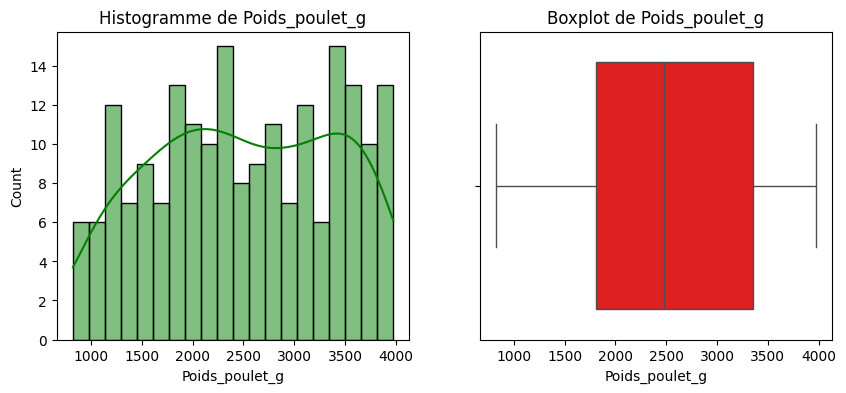

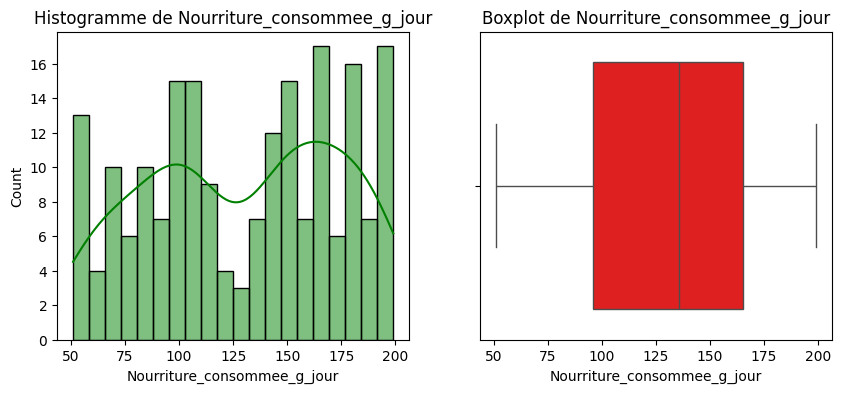

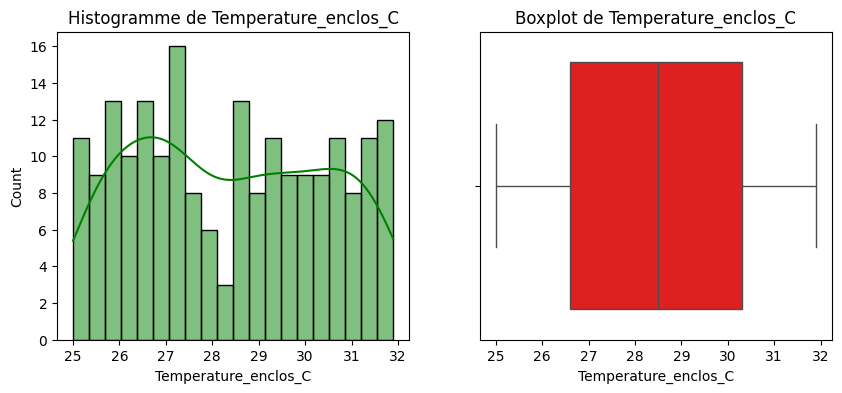

In [105]:
# Création de groupes basés sur la médiane du poids (Poids_poulet_g)
df['groupe'] = (df['Poids_poulet_g'] > df['Poids_poulet_g'].median()).astype(int)

# Exercice 1 : Statistiques descriptives
for col in ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']:
    print(f"\nStatistiques pour {col}:")
    print(f"Moyenne: {df[col].mean():.2f}, Médiane: {df[col].median():.2f}")
    print(f"Écart-type: {df[col].std():.2f}, Variance: {df[col].var():.2f}")
    print(f"Quartiles: {df[col].quantile([0.25, 0.5, 0.75]).values}")

# Visualisation des données
for col in ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color = 'green')
    plt.title(f"Histogramme de {col}")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color = 'red')
    plt.title(f"Boxplot de {col}")
    plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from scipy import stats

# Sélectionner les colonnes spécifiques pour le calcul des Z-scores
cols_to_check = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']

# Standardisation des données (seulement pour les colonnes spécifiques)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[cols_to_check]), columns=cols_to_check)

# Calcul des Z-scores pour les colonnes spécifiques
z_scores = np.abs(stats.zscore(df_scaled))

# Ajustement du seuil de détection des outliers
seuil = 1.5

# Détection des outliers (avec Z-score > seuil) pour les 3 colonnes
outliers_z = df_cleaned[(z_scores.iloc[:, 0] > seuil) | (z_scores.iloc[:, 1] > seuil) | (z_scores.iloc[:, 2] > seuil)]

# Afficher le nombre d'outliers détectés
print(f"Nombre d'outliers détectés avec Z-Score (seuil={seuil}): {len(outliers_z)}")

# Afficher les outliers détectés
print("\nOutliers détectés :")
print(outliers_z[cols_to_check])


Nombre d'outliers détectés avec Z-Score (seuil=1.5): 66

Outliers détectés :
     Poids_poulet_g  Nourriture_consommee_g_jour  Temperature_enclos_C
0              3974                           52                  27.6
1              1660                          152                  31.7
5              3892                          108                  26.1
10             1130                          101                  25.1
11             2282                           61                  31.8
..              ...                          ...                   ...
180            3860                          107                  27.4
182            1595                           98                  31.5
187            2154                           57                  28.9
191            2296                           54                  31.3
193            2208                           55                  29.4

[66 rows x 3 columns]


In [107]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes spécifiques pour l'analyse
cols_to_check = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']

# --- Test de normalité de Shapiro-Wilk ---
print("\n Test de normalité de Shapiro-Wilk ")
for col in cols_to_check:
    stat, p = stats.shapiro(df_cleaned[col])
    print(f"\nTest de Shapiro-Wilk pour {col}: p-value = {p:.4f}")
    if p > 0.05:
        print(f"   La distribution de {col} semble normale (p > 0.05).")
    else:
        print(f"   La distribution de {col} ne semble pas normale (p ≤ 0.05).")

# --- Standardisation des données pour le Z-score ---
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[cols_to_check]), columns=cols_to_check)

# Calcul des Z-scores pour les colonnes spécifiques
z_scores = np.abs(stats.zscore(df_scaled))

# Détection des outliers avec un seuil Z-score de 1.5
seuil = 1.5
outliers_z = df_cleaned[(z_scores.iloc[:, 0] > seuil) |
                        (z_scores.iloc[:, 1] > seuil) |
                        (z_scores.iloc[:, 2] > seuil)]

# Afficher les résultats des outliers détectés par Z-score
print(f"\n Nombre d'outliers détectés avec Z-Score (seuil={seuil}): {len(outliers_z)}")
print("\n Outliers détectés (Z-Score) :")
print(outliers_z[cols_to_check])

# --- Détection des outliers avec IQR ---
Q1 = df_cleaned[cols_to_check].quantile(0.25)
Q3 = df_cleaned[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détection des outliers avec IQR
outliers_iqr = df_cleaned[(df_cleaned[cols_to_check] < lower_bound) |
                          (df_cleaned[cols_to_check] > upper_bound)].dropna()

# Afficher les résultats des outliers détectés par IQR
print(f"\n Nombre d'outliers détectés avec IQR : {len(outliers_iqr)}")
print("\n Outliers détectés (IQR) :")
print(outliers_iqr[cols_to_check])



 Test de normalité de Shapiro-Wilk 

Test de Shapiro-Wilk pour Poids_poulet_g: p-value = 0.0000
   La distribution de Poids_poulet_g ne semble pas normale (p ≤ 0.05).

Test de Shapiro-Wilk pour Nourriture_consommee_g_jour: p-value = 0.0000
   La distribution de Nourriture_consommee_g_jour ne semble pas normale (p ≤ 0.05).

Test de Shapiro-Wilk pour Temperature_enclos_C: p-value = 0.0000
   La distribution de Temperature_enclos_C ne semble pas normale (p ≤ 0.05).

 Nombre d'outliers détectés avec Z-Score (seuil=1.5): 66

 Outliers détectés (Z-Score) :
     Poids_poulet_g  Nourriture_consommee_g_jour  Temperature_enclos_C
0              3974                           52                  27.6
1              1660                          152                  31.7
5              3892                          108                  26.1
10             1130                          101                  25.1
11             2282                           61                  31.8
..              

5. Tests de normalité (Shapiro-Wilk)

Variable: Poids_poulet_g
Statistique: 0.9568, p-value: 0.0000
 Distribution non normale (on rejette H0)


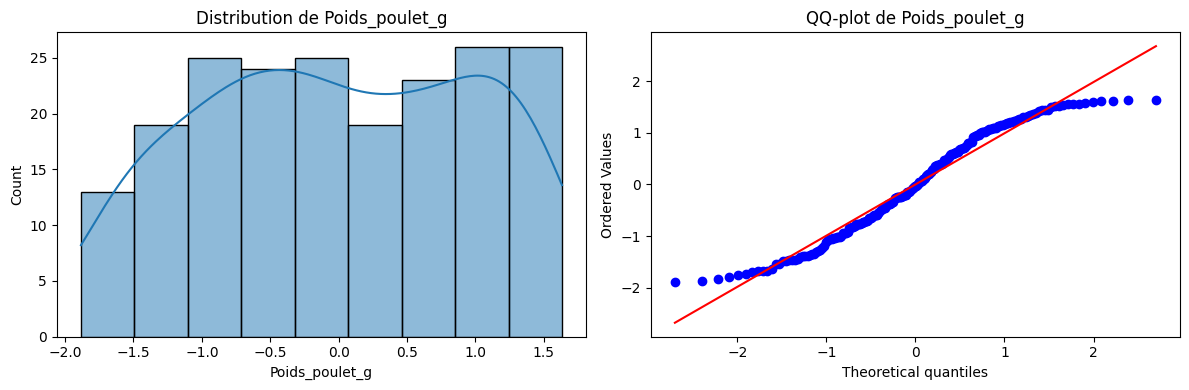


Variable: Nourriture_consommee_g_jour
Statistique: 0.9449, p-value: 0.0000
 Distribution non normale (on rejette H0)


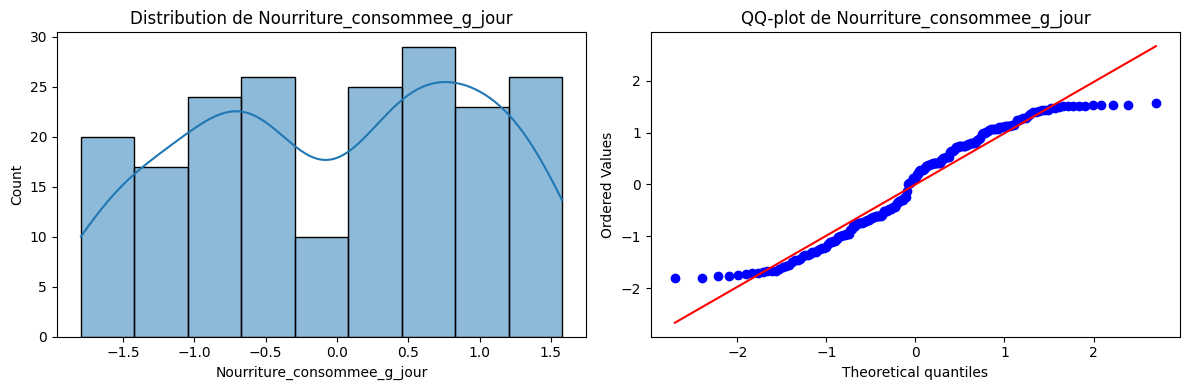


Variable: Temperature_enclos_C
Statistique: 0.9432, p-value: 0.0000
 Distribution non normale (on rejette H0)


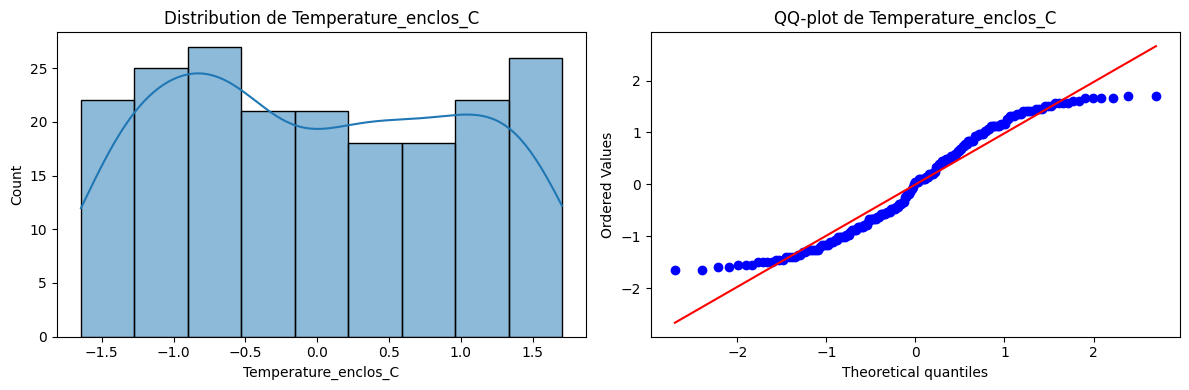


6. Comparaison de moyennes

 La colonne 'Age_poulet_jours' n'existe pas dans les données ! Vérifie ton dataset.


In [109]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Sélection des variables à analyser
variables = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']

# 🔹 5. TEST DE NORMALITÉ (SHAPIRO-WILK)
print("="*70)
print("5. Tests de normalité (Shapiro-Wilk)")
print("="*70)

for var in variables:
    stat, p = stats.shapiro(df_scaled[var])
    print(f"\nVariable: {var}")
    print(f"Statistique: {stat:.4f}, p-value: {p:.4f}")

    if p > 0.05:
        print(" Distribution normale (on ne rejette pas H0)")
    else:
        print(" Distribution non normale (on rejette H0)")

    # 🔹 Visualisation
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[var], kde=True)
    plt.title(f'Distribution de {var}')

    plt.subplot(1, 2, 2)
    stats.probplot(df_scaled[var], dist="norm", plot=plt)
    plt.title(f'QQ-plot de {var}')

    plt.tight_layout()
    plt.show()

# 🔹 6. COMPARAISON DE MOYENNES
print("\n" + "="*70)
print("6. Comparaison de moyennes")
print("="*70)

# Création de groupes (vérifie que 'Age_poulet_jours' existe)
if 'Age_poulet_jours' in df_scaled.columns:
    df_scaled['Groupe_temp'] = np.where(df_scaled['Temperature_enclos_C'] > df_scaled['Temperature_enclos_C'].median(), 'Haute', 'Basse')
    df_scaled['Groupe_age'] = pd.qcut(df_scaled['Age_poulet_jours'], q=3, labels=['Jeune', 'Moyen', 'Âgé'])

    # a) TEST T DE STUDENT
    print("\na) Test t pour le poids entre groupes de température:")
    group1 = df_scaled[df_scaled['Groupe_temp'] == 'Haute']['Poids_poulet_g']
    group2 = df_scaled[df_scaled['Groupe_temp'] == 'Basse']['Poids_poulet_g']

    # Test de Levene (égalité des variances)
    lev_stat, lev_p = stats.levene(group1, group2)
    print(f"Test de Levene: p-value = {lev_p:.4f}")

    # Choix du test t
    if lev_p > 0.05:
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)
        print(" Test t standard (variances égales)")
    else:
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        print(" Test t de Welch (variances inégales)")

    print(f"t-statistique: {t_stat:.3f}, p-value: {p_val:.4f}")

    # Visualisation
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Groupe_temp', y='Poids_poulet_g', data=df_scaled)
    plt.title('Comparaison du poids par groupe de température')
    plt.show()

    # b) ANOVA À UN FACTEUR
    print("\nb) ANOVA pour le poids entre groupes d'âge:")

    # Vérification des hypothèses
    print("\n Vérification des hypothèses:")

    # Normalité par groupe
    for name, group in data.groupby('Groupe_age')['Poids_poulet_g']:
        _, p = stats.shapiro(group)
        print(f"Normalité groupe {name}: p = {p:.4f}")

    # Homogénéité des variances
    lev_stat, lev_p = stats.levene(*[group for name, group in df_scaled.groupby('Groupe_age')['Poids_poulet_g']])
    print(f"Test de Levene: p = {lev_p:.4f}")

    # ANOVA
    f_stat, p_val = stats.f_oneway(*[group for name, group in df_scaled.groupby('Groupe_age')['Poids_poulet_g']])
    print(f"\n Résultats ANOVA: F = {f_stat:.3f}, p-value = {p_val:.4f}")

    if p_val > 0.05:
        print("→ Pas de différence significative entre les groupes")
    else:
        print("→ Différence significative entre au moins deux groupes")

        # Test post-hoc de Tukey
        print("\n Test post-hoc de Tukey:")
        tukey = pairwise_tukeyhsd(endog=df_scaled['Poids_poulet_g'], groups=df_scaled['Groupe_age'], alpha=0.05)
        print(tukey)

    # Visualisation
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Groupe_age', y='Poids_poulet_g', data=df_scaled)
    plt.title("Comparaison du poids par groupe d'âge")
    plt.show()
else:
    print("\n La colonne 'Age_poulet_jours' n'existe pas dans les données ! Vérifie ton dataset.")


In [110]:
# Test t-Student et ANOVA
group1, group2 = df['Poids_poulet_g'][df['groupe'] == 0], df['Poids_poulet_g'][df['groupe'] == 1]
stat, p = stats.ttest_ind(group1, group2)
print(f"\nTest t-Student : p-value = {p:.4f}")

anova = stats.f_oneway(df[df['groupe'] == 0]['Poids_poulet_g'], df[df['groupe'] == 1]['Poids_poulet_g'])
print(f"Test ANOVA : p-value = {anova.pvalue:.4f}")


Test t-Student : p-value = 0.0000
Test ANOVA : p-value = 0.0000


In [112]:
# --- Exercice 4 : ACP (Analyse en Composantes Principales) ---
# 7. ACP sans scikit-learn
X = df[['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']].values
cov_matrix = np.cov(X.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print("\nValeurs propres de l'ACP sans scikit-learn :", eig_values)



Valeurs propres de l'ACP sans scikit-learn : [8.07201724e+05 1.92378347e+03 4.11970613e+00]


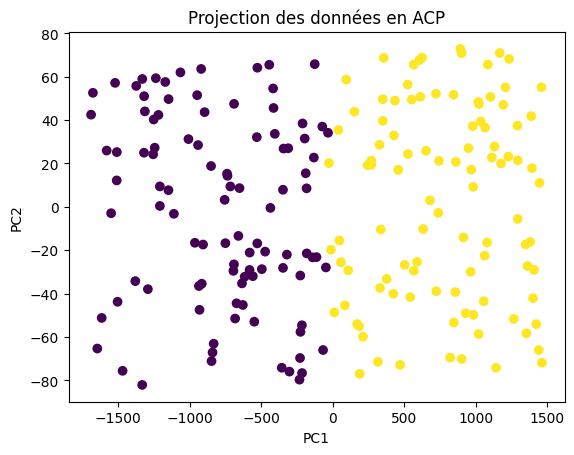

In [113]:
# 8. Projection sur les deux premières composantes principales (PCA avec scikit-learn)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisation de la projection
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['groupe'], cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des données en ACP")
plt.show()

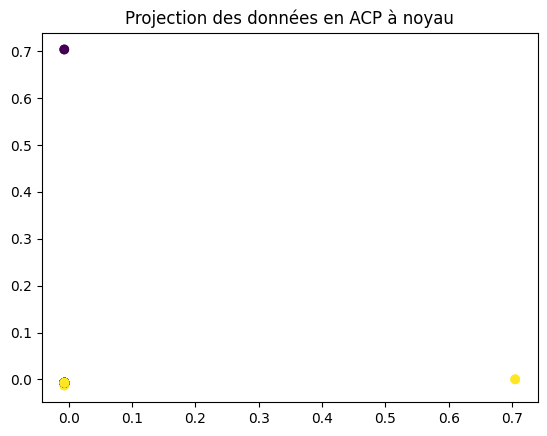

In [114]:
# --- Exercice 5 : ACP à noyau ---
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)

# Visualisation de la projection
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=df['groupe'], cmap='viridis')
plt.title("Projection des données en ACP à noyau")
plt.show()

In [115]:
# --- Exercice 6 : Bagging (Random Forest) ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Utilisation d'un régressseur
from sklearn.metrics import mean_squared_error, r2_score

# Variable cible (continue)
y = df['Taux_survie_%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle Random Forest (Régression)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = rf.predict(X_test)

# Evaluation du modèle
print("\nRandom Forest - Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Random Forest - R^2 Score:", r2_score(y_test, y_pred))



Random Forest - Mean Squared Error: 39.87102809999987
Random Forest - R^2 Score: -0.2554848299494803


In [116]:
# --- Exercice 7 : Boosting (AdaBoost et Gradient Boosting) ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor  # Ajouter ces imports
from sklearn.metrics import mean_squared_error

# Variable cible pour la régression
y_reg = df['Gain_poids_jour_g']
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Modèle AdaBoost
adaboost = AdaBoostRegressor(n_estimators=100)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# Modèle Gradient Boosting
gradient_boost = GradientBoostingRegressor(n_estimators=100)
gradient_boost.fit(X_train, y_train)
y_pred_grad = gradient_boost.predict(X_test)

# Evaluation des modèles
print("\nAdaBoost - MSE:", mean_squared_error(y_test, y_pred_ada))
print("Gradient Boosting - MSE:", mean_squared_error(y_test, y_pred_grad))



AdaBoost - MSE: 27.834660469215237
Gradient Boosting - MSE: 36.327225115732105
